# Lógica e Programação - Aula 09
## Graduação Online - PUCRS/UOL EdTech

## Dinâmica - Exercício de Fixação (Eleições Municipais)

### Marcelo Cohen (marcelo.cohen@pucrs.br)
### Sílvia Maria Wanderley Moraes (silvia.moraes@pucrs.br)



## Enunciado

Você tem acesso aos dados completos de votação das Eleições Municipais, para todo o estado do RS, bem como à lista de partidos.

O arquivo de dados de votação possui o seguinte formato

```
numero_turno,nome_municipio,sigla_partido,descricao_cargo,nome,total_votos
1,AUREA,PR,PREFEITO,ANTONIO PINTO ANDREOLA OLIBONI,1513
1,AUREA,PV,PREFEITO,ITO ROST DE BORBA,1213
1,AUREA,PR,VEREADOR,JOAO BORGES,122
1,AUREA,PR,VEREADOR,VANJA ANTONIO VARGAS,268
... 
```

Onde:

  - 1: turno (pode ser 1 ou 2, para vereador os votos estão sempre no 1o. turno)
  - AUREA: nome da cidade
  - PR: sigla do partido
  - PREFEITO: cargo (pode ser VEREADOR ou PREFEITO)
  - ANTONIO PINTO ANDREOLA OLIBONI: nome do(a) candidato(a)
  - 1513: total de votos neste grupo de urnas

Pode haver repetição de nomes, pois as urnas foram separadas em grupos (provavelmente de diversas seções eleitorais), portanto é preciso somar todas as linhas que se referirem a uma determinada pessoa.

O arquivo de partidos, fornecido para facilitar a exibição posterior dos dados, usa o seguinte formato:

```
sigla,nome
PR,PARTIDO RENASCENTISTA
PV,PARTIDO VIAJANTE
PG,PARTIDO GRANDIOSO
PSF,PARTIDO SOCIAL FELIZ
...
```

O objetivo desta contabilização é determinar a composição da Câmara Municipal de uma determinada cidade.

A eleição de vereadores segue o chamado **sistema proporcional**, isto é, os partidos que tiveram mais votos terão direito a mais vagas. Com isso, um(a) candidato(a) que tenha tido uma quantidade expressiva de votos pode até não se eleger, por seu partido não ter vagas suficientes.

Esse sistema se baseia nos chamados quocientes eleitoral e partidário.

O **quociente eleitoral** é calculado através do número de votos válidos registrados (ou seja, descartando-se os brancos e nulos), dividido pelo número de vagas. Por exemplo, se um município contabilizou 10000 votos válidos e sua câmara só tem 10 vagas, o quociente eleitoral será 1000.

Já o **quociente partidário** nos dá quantas vezes um determinado partido ultrapassou o quociente eleitoral, e portanto, a quantidade de vagas que esse partido terá direito. Por exemplo, suponha o seguinte resultado:

  - Partido A: recebeu 3 mil votos
  - Partido B: recebeu 1,5 mil votos
  - Partido C: recebeu 900 votos

Nessa situação, o partido A terá direito a 3 vagas (3000/1000), o partido B terá direito a uma vaga (1500/1000) e o partido C não terá direito a nenhuma (900/1000)

Geralmente, porém, esse sistema não preenche todas as vagas. As vagas restantes serão preenchidas pelo cálculo da media: o número de votos válidos recebido pelo partido dividido pelo número de vereadores que elegeu mais um.

Ou seja, o partido A terá uma media de 750 (resultado de 3 mil votos divididos por 3 vagas conquistadas + 1); o partido B também terá uma media de 750 (1,5 mil dividido por 1 + 1); e o C terá uma media de 900 (900 dividido por 0 + 1). Nesse caso, a primeira vaga remanescente caberia ao partido C, que obteve a maior media - e assim por diante, até completar todas as vagas.

O seu programa deverá realizar as tarefas descritas abaixo, em ordem.

In [ ]:
!curl https://raw.githubusercontent.com/mflash/logicaeprogramacao/main/aula09/partidos-fake.csv -o partidos-fake.csv
!curl https://raw.githubusercontent.com/mflash/logicaeprogramacao/main/aula09/eleicoes-municipais-fake.csv -o eleicoes-municipais-fake.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1078  100  1078    0     0  14567      0 --:--:-- --:--:-- --:--:-- 14567
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1980k  100 1980k    0     0  17.4M      0 --:--:-- --:--:-- --:--:-- 17.4M


## Parte 1

1. Ler os dados da votação e dos partidos, usando listas e/ou dicionários.

2. Perguntar ao usuário qual é a cidade desejada e o total de vagas na Câmara. Isso é necessário, pois a quantidade de vagas varia de acordo com o tamanho do município. Por exemplo, em Porto Alegre há 36 vagas, já em Caxias do Sul há 23, e em Viamão há 21. Você pode experimentar com outras cidades, basta saber o número exato.

3. Contabilizar os votos para cada partido, e para cada candidato(a) individual

In [ ]:
cid = input("Cidade:").upper()
vagas = int(input("Vagas:"))

partidos = {}   # nome, total de votos, vagas (quoc. part) e media
votos = {}      # sigla e total de votos
totalGeral = 0

with open("partidos-fake.csv") as csv:
  csv.readline()
  for linha in csv:
    dados = linha[:-1].split(",")
    aux = { 'nome': dados[1], 'votos': 0, 'vagas': 0,
           'media': 0}
    partidos[dados[0]] = aux

with open("eleicoes-municipais-fake.csv") as csv:
  csv.readline()
  for linha in csv:
    dados = linha[:-1].split(",")
    cidade = dados[1]
    sigla = dados[2]
    cargo = dados[3]
    nome = dados[4]
    totalVotos = int(dados[5])
    if cidade != cid or cargo != "VEREADOR":
      continue
    if nome not in votos:
      votos[nome] = { "sigla": sigla, "votos": 0}
    votos[nome]["votos"] += totalVotos
    partidos[sigla]["votos"] += totalVotos
    totalGeral += totalVotos


Cidade:porto alegre
Vagas:36


## Parte 2

4. Calcular o quociente eleitoral (geral)...

$$qe = \frac{validos}{vagas}$$

In [ ]:
print(f"Total votos: {totalGeral}")
qe = totalGeral//vagas
print(f"QE: {qe}")

Total votos: 621331
QE: 17259


4. ...e partidário (para cada partido).

$$qp = \frac{votosPartido}{qe}$$

5. Com base nesses cálculos, determinar quantas vagas cada partido receberá inicialmente.

$$vagasPartido = qp$$

In [ ]:
# Calcula as vagas iniciais
somaVagas = 0

for sigla,dados in partidos.items():
  qp = dados['votos']//qe
  if qp > 0:
    dados['vagas'] = qp
    somaVagas += qp
    print(sigla,dados)
# ...

print()
print("Total de vagas já ocupadas:",somaVagas)
print()

PR {'nome': 'PARTIDO RENASCENTISTA', 'votos': 55276, 'vagas': 3, 'media': 0}
PV {'nome': 'PARTIDO VIAJANTE', 'votos': 58136, 'vagas': 3, 'media': 0}
PG {'nome': 'PARTIDO GRANDIOSO ', 'votos': 46495, 'vagas': 2, 'media': 0}
PSF {'nome': 'PARTIDO SOCIAL FELIZ', 'votos': 18684, 'vagas': 1, 'media': 0}
PVN {'nome': 'PARTIDO VIGILANTE NACIONAL', 'votos': 72397, 'vagas': 4, 'media': 0}
PGB {'nome': 'PARTIDO GRANDE BRASILEIRO', 'votos': 68148, 'vagas': 3, 'media': 0}
PST {'nome': 'PARTIDO SOCIAL DA TERRA', 'votos': 51590, 'vagas': 2, 'media': 0}
PEN {'nome': 'PARTIDO DO EMPREGO NACIONAL', 'votos': 26856, 'vagas': 1, 'media': 0}
MFT {'nome': 'MOVIMENTO FELIZ E TRABALHADOR', 'votos': 28043, 'vagas': 1, 'media': 0}
PAC {'nome': 'PARTIDO DA AÇÃO COMUNITÁRIA', 'votos': 18131, 'vagas': 1, 'media': 0}
PPF {'nome': 'PARTIDO DAS PESSOAS FELIZES', 'votos': 20069, 'vagas': 1, 'media': 0}
PLI {'nome': 'PARTIDO DA LIBERDADE INDIVIDUAL', 'votos': 51429, 'vagas': 2, 'media': 0}
PPP {'nome': 'PARTIDO DA PATR

## Parte 3

6. Considerando as vagas que restam, atribui-las a cada partido, de acordo com o cálculo da média ( número de votos válidos recebido pelo partido dividido pelo total de vagas já recebidas + 1).

$$mediaPartido = \frac{votosPartido}{vagasPartido+1}$$

In [ ]:
# Calcula a média de cada partido, de acordo com o total de votos e as vagas já recebidas

for sigla,dados in partidos.items():
  me = dados['votos']//(dados['vagas']+1)
  dados['media'] = me
  #print(sigla,dados)

# Distribuir vagas disponíveis para cada partido, em ordem decrescente
# de media
for sigla,dados in sorted(partidos.items(), key=lambda x:x[1]['media'],
                          reverse=True):
  if somaVagas < vagas:
    dados['vagas'] += 1
    somaVagas += 1

#print(f"Total vagas ocup.: {somaVagas}")
# ... 

salvaVagas = {} # armazena o total de vagas original para cada partido
for p in partidos:
  salvaVagas[p] = partidos[p]['vagas']

7. Determinar os(as) candidatos(as) eleitos(as), apresentando uma tabela com o nome, total de votos recebidos e nome completo do partido. É necessário percorrer todos os candidatos, em ordem decrescente de votos - enquanto houver vagas para o partido, indica que o candidato foi eleito.

In [ ]:
# Finalmente, passa por todos os candidatos, em ordem decrescente de votos,
# e enquanto houver vagas para o partido, mostra que foi eleito (e diminui uma
# vaga do partido)

for nome,dados in sorted(votos.items(), key=lambda x:x[1]['votos'], reverse=True):
  sigla = dados['sigla']
  if partidos[sigla]['vagas'] > 0:
    print(f"{nome:40} {sigla:4} {dados['votos']} votos")
    partidos[sigla]['vagas'] -= 1

# ...

FERNANDA DE JESUS OLIVEIRA HENRIQUES     PLI  14630 votos
MAURO ADRIANA LIPPERT DA SILVA           PG   13551 votos
THIAGO DA SILVA VERNIERI                 MFT  12669 votos
RODRIGO ALMEIDA VIEIRA                   PO   11770 votos
FELIPE FERREIRA ABRAO                    PIA  10488 votos
ELIZANDRO PAULA PINHEIRO BRUNO           PGB  9845 votos
SOFIA ALTHAUS                            PV   9670 votos
VALTER NOE FURTADO DE FRAGA              PVN  9300 votos
CARLOS OSMAR DOS SANTOS LUIZ             PLI  8354 votos
JOSE VIEIRA DE VARGAS                    PSF  7728 votos
MARCELO RICARDO STURMER                  PV   7585 votos
MONICA PRIGOL RIBEIRO                    PR   7254 votos
JOSE FRAINS DE LIMA                      PPP  7106 votos
ANDRE VINICIUS FRANQUI VARGAS            PVN  6882 votos
MARCIO PAULA VELHO                       PG   6858 votos
NADIA BRAGA COFFI                        PVN  6809 votos
PABLO FRANCA DE OLIVEIRA                 PVN  6691 votos
IDENIR AMARAL GOMES       

## Parte 4

8. Desenhar, em um gráfico de barras, a distribuição de vagas na Câmara para cada partido (partidos sem vagas não devem sem exibidos). Pode ser em ordem de vagas, ou não.

{'PR': 3, 'PV': 4, 'PG': 3, 'PSF': 1, 'PVN': 5, 'PGB': 4, 'PST': 3, 'PEN': 1, 'PPL': 0, 'PGDB': 0, 'PSO': 0, 'MFT': 2, 'PAC': 1, 'PPI': 1, 'PMMA': 0, 'PCT': 1, 'PPF': 1, 'PA': 0, 'PO': 1, 'PRB': 0, 'PLI': 3, 'PE': 0, 'PSN': 0, 'PPC': 0, 'PPO': 0, 'PPP': 1, 'PUB': 0, 'PEC': 0, 'PLB': 0, 'PS': 0, 'PEB': 0, 'PIA': 1, 'PCN': 0}

Total de vagas ocupadas: 36



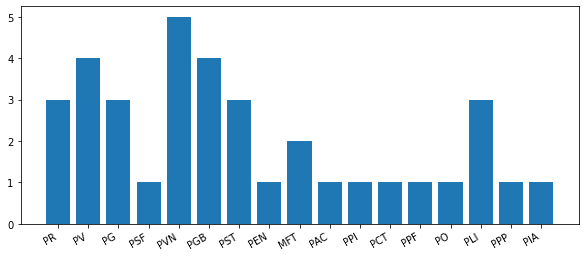

In [ ]:
import matplotlib.pyplot as plt

print(salvaVagas)

totalFinalVagas = 0
nomes = []
valores = []

# Monta a lista de nomes (siglas) e valores (total de votos)
# para o gráfico

for p in salvaVagas:
  if salvaVagas[p] > 0:
    nomes.append(p)
    valores.append(salvaVagas[p])
    totalFinalVagas += salvaVagas[p]

# ...

print()
print("Total de vagas ocupadas:",totalFinalVagas)
print()
    
plt.figure(figsize=(10,4))
plt.xticks(rotation=30, ha='right')
plt.bar(nomes,valores)
plt.show()